# Measure the Magnification on One Camera

## Introduction

This workbook allows you to measure the magnification on one camera.

## Import necessary modules:

In [1]:
import numpy as np
import csv
from PIL import Image
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd
from scipy import interpolate

## Set the data folder and save folder paths (may be the same):

In [2]:
#Change the path below to the folder where your images are saved
datapath = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\3D Printed Microscopes\\20210211\\'

#Change the path below to where you want to save the analysis data to
savepath = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\3D Printed Microscopes\\20210211\\Analysis\\'

## Camera 1 Analysis

### (This should be the camera with the smallest optical path length to the objective lens)
### Import image using pillow, convert to grayscale and convert to numpy array:

In [3]:
imgcam1 = Image.open(datapath + '20210211_07.png').convert('L')

#Change file name above to the filename for your camera 1 image and then run this block of code

datacam1 = np.array(imgcam1)
print('Numpy array shape:')
print(datacam1.shape)

#Check that the below array shape matches the dimensions of your image

Numpy array shape:
(2464, 3280)


### Plot the image using matplotlib:

The block of code below will plot the above numpy array as a 2D image. Using the mpl cursors library you can then click on part of the image to bring up a data cursor with the x and y pixel values. Use this to select start and end points for the line profile used for the distance measurement. To delete a cursor, right click on it. You can drag the labels to different positions. The block of code under the figure allows you to save the figure with the data cursor labels included on it.

<IPython.core.display.Javascript object>


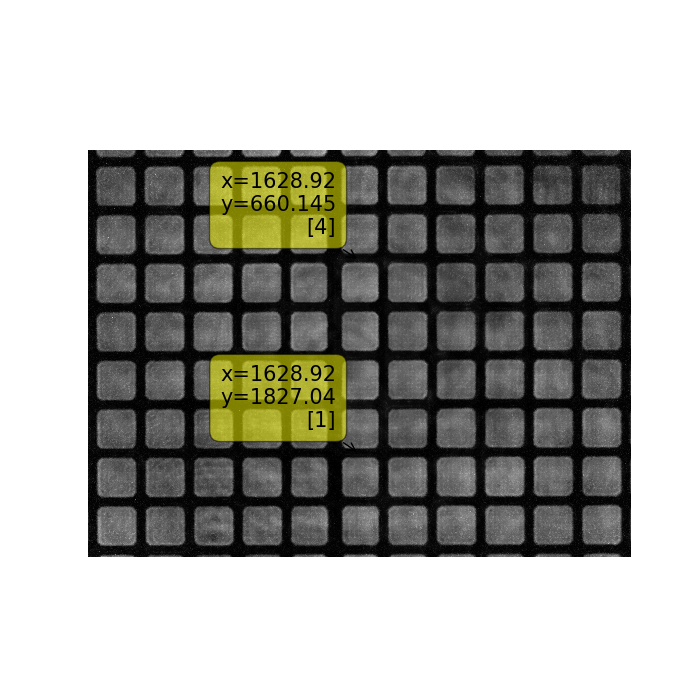

In [33]:
#You don't need to change anything in this block of code unless you want to alter the font size and figure size

%matplotlib notebook
plt.figure(1)
plt.rcParams.update({'font.size' : 15})
plt.rcParams.update({'figure.figsize' :[7, 7]})
plt.imshow(datacam1, cmap='gray')
mplcursors.cursor(multiple=True)
plt.axis('off')
plt.show()

### Save the above figure with labels:

In [12]:
#Alter the file name below to what you want your file to be called

plt.savefig(savepath + 'figure3.tif', bbox_inches='tight')

### Input the cursor coordinates below:

Input the values below from the data cursors above where x1 and y1 is the starting pixel and x2 and y2 is the end pixel (keeping y1=y2 gives a horizontal line profile). You can then choose to save the data to a csv file if required.

In [34]:
#Change the values below to your chosen start and end pixels for the figure above

#Pixel1
x1cam1 = 1629
y1cam1 = 660

#Pixel2
x2cam1 = 1629
y2cam1 = 1827

#If save = True then the values above will be saved to a csv file. If save = False then they will not be saved.
#Change save variable below to either True or False.

save = True

if save == True:
    
    #Change the file path below to where you want the csv file to save to and what you wish to name it.
    with open(savepath + "data6.csv", "w+", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["x1cam1", x1cam1])
        writer.writerow(["y1cam1", y1cam1])
        writer.writerow(["x2cam1", x2cam1])
        writer.writerow(["y2cam1", y2cam1])

### Plot line profile:

Now we want to extract this line profile from the 2D numpy array and plot x vs gray value:

If 'average' below is set to True then the line profile will be averaged over the row you have selected and the row above and below it. If set to False then averaging will not take place.

<IPython.core.display.Javascript object>


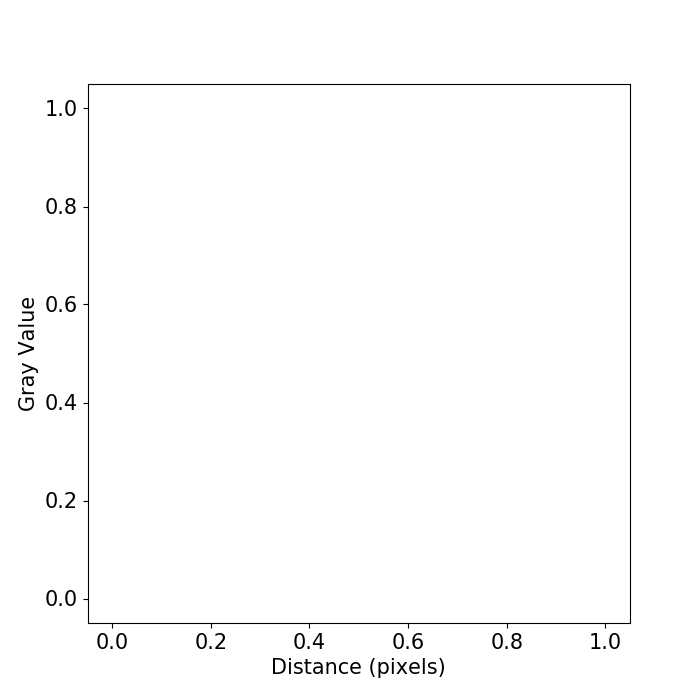

In [35]:
#Set average to either True or False
average = True

#The below code doesn't need altered unless you want to change the formatting of the plots

if average == True:
    
    y3cam1 = y1cam1+1
    y4cam1 = y3cam1+1
    
    y5cam1 = y1cam1-1
    y6cam1 = y5cam1 +1
    
    lineprofilecam1 = np.mean(datacam1[y5cam1:y4cam1, x1cam1:x2cam1], axis=0)
    xcam1 = np.linspace(x1cam1,x2cam1-1,x2cam1-x1cam1)
    
    %matplotlib notebook
    plt.figure(2)
    plt.plot(xcam1, lineprofilecam1, color='black')
    plt.xlabel('Distance (pixels)')
    plt.ylabel('Gray Value')
    mplcursors.cursor(multiple=True)
    plt.show()
    
    
if average == False:
    
    lineprofilecam1 = np.mean(datacam1[y1cam1:y1cam1+1,x1cam1:x2cam1], axis=0)
    xcam1 = np.linspace(x1cam1,x2cam1-1,x2cam1-x1cam1)
    %matplotlib notebook
    plt.figure(2)
    plt.plot(xcam1, lineprofilecam1, color='black')
    plt.xlabel('Distance (pixels)')
    plt.ylabel('Gray Value')
    mplcursors.cursor(multiple=True)
    plt.show()

In [38]:
#Set average to either True or False
average = True

#The below code doesn't need altered unless you want to change the formatting of the plots

if average == True:
    
    x3cam1 = x1cam1+1
    x4cam1 = x3cam1+1
    
    x5cam1 = x1cam1-1
    x6cam1 = x5cam1 +1
    
    lineprofilecam1 = np.mean(datacam1[x5cam1:x4cam1, y1cam1:y2cam1], axis=1)
    xcam1 = np.linspace(y1cam1,y2cam1-1,y2cam1-y1cam1)
    
    %matplotlib notebook
    plt.figure(2)
    plt.plot(xcam1, lineprofilecam1, color='black')
    plt.xlabel('Distance (pixels)')
    plt.ylabel('Gray Value')
    mplcursors.cursor(multiple=True)
    plt.show()
    
    
if average == False:
    
    lineprofilecam1 = np.mean(datacam1[y1cam1:y1cam1+1,x1cam1:x2cam1], axis=0)
    xcam1 = np.linspace(x1cam1,x2cam1-1,x2cam1-x1cam1)
    %matplotlib notebook
    plt.figure(2)
    plt.plot(xcam1, lineprofilecam1, color='black')
    plt.xlabel('Distance (pixels)')
    plt.ylabel('Gray Value')
    mplcursors.cursor(multiple=True)
    plt.show()

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (1167,) and (3,)

### Measure distance on plot:

On the above plot click on part of the graph to bring up the point coordinates. The label can be dragged around and moved out of the way. Clicking on multiple points brings up multiple coordinate labels. To delete a label right click on it. 

Select two points to measure a distance and input the x coordinates into the variables below, x_start and x_end. Select whether to append the data or not to the saved csv file from the last section.

In [31]:
#Change these two variables to those on the cursors for the data points you have selected
x_start_cam1 = 2109
x_end_cam1 = 2989

#This measures the distance for you
distancecam1 = x_end_cam1-x_start_cam1
print("distance = ",distancecam1)

#Set to either True or False depending if you want to save the data or not
save = True

if save == True:
    
    #Change the file path below to the same as the csv file path above. We will append the data to it.
    with open(savepath + "data5.csv", "a", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["x_start_cam1", x_start_cam1])
        writer.writerow(["x_end_cam1", x_end_cam1])
        writer.writerow(["distancecam1", distancecam1])
    

distance =  880


### Save plot:

In [16]:
#Alter the file name below to what you want the file to be called

plt.savefig(savepath + 'figure4.tif', bbox_inches='tight')

## Turn Distances into Magnifications

Enter the pixel size of your camera and the actual size of the feature you are measuring below (both should have the same units, in this case um):

In [32]:
pixelsize = 1.12
realfeaturesize = 30

distance_in_um_cam1 = distancecam1*pixelsize
print(distance_in_um_cam1)

magnificationcam1 = distance_in_um_cam1/realfeaturesize
print(magnificationcam1)

#Set to either True or False depending if you want to save the data or not
save = True

if save == True:
    
    #Change the file path below to the same as the csv file path above. We will append the data to it.
    with open(savepath + "data5.csv", "a", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["distance_in_um_cam1", distance_in_um_cam1])
        writer.writerow(["magnificationcam1", magnificationcam1])

985.6000000000001
32.85333333333334
